In [187]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## Données

dimensions de X: (100, 2)
dimensions de y: (100, 1)


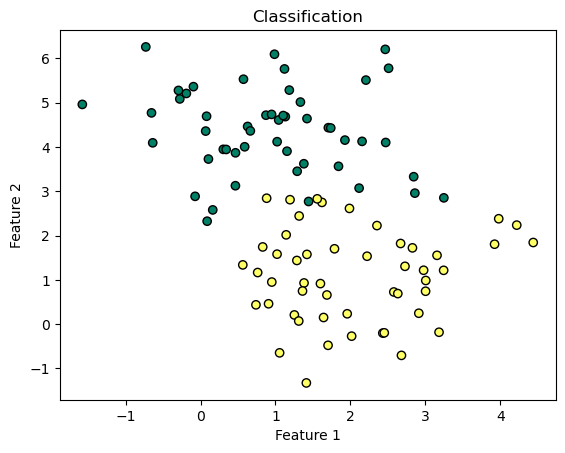

In [152]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,random_state=0)

y = y.reshape(y.shape[0], 1)

print("dimensions de X:", X.shape)
print("dimensions de y:", y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer", edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Classification")
plt.show()


In [153]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [154]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [155]:
def log_loss(A, y):
    epsilon = 1e-15 # Tend vers 0 sans jamais l’atteindre, on l’ajoute aux logs pour éviter les log(0) non définit
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [156]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)


In [157]:
def update(dW, db, W, b, learning_rate): 
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return(W, b)

In [158]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5


In [159]:
from sklearn.metrics import accuracy_score

In [198]:
from tqdm import tqdm

In [216]:
def artificial_neuron(X_train, y_train, X_test, y_test ,learning_rate = 0.1, n_iter = 100): # On fait passer notre X_train et y_train, et, créer les variables X_test et y_test.
    W, b = initialisation(X_train)

    # Train
    train_loss = []
    train_acc = []
    
    # Test
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        # Activations
        A = model(X_train, W, b) # Activation du train set

        if i %10 == 0: # Cela s’effectue tout les multiples de 10 et cela va permettre d’executer du code plus rapidement
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b) # Calcul préalbale pour utiliser accuracy score sur y_pred
            train_acc.append(accuracy_score(y_train, y_pred)) # On importe l’acc de sklearn entre y et y_pred

            # Test
            A_test = model(X_test, W, b) # Calcul de l’activation de A test
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b) 
            test_acc.append(accuracy_score(y_test, y_pred)) 

        # Mise à jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.show()

    return(W, b)
    

Importation des données

In [161]:
from utilities import load_data
X_train, y_train, X_test, y_test = load_data()

Dataset Train

In [162]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


Dataset Test

In [163]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


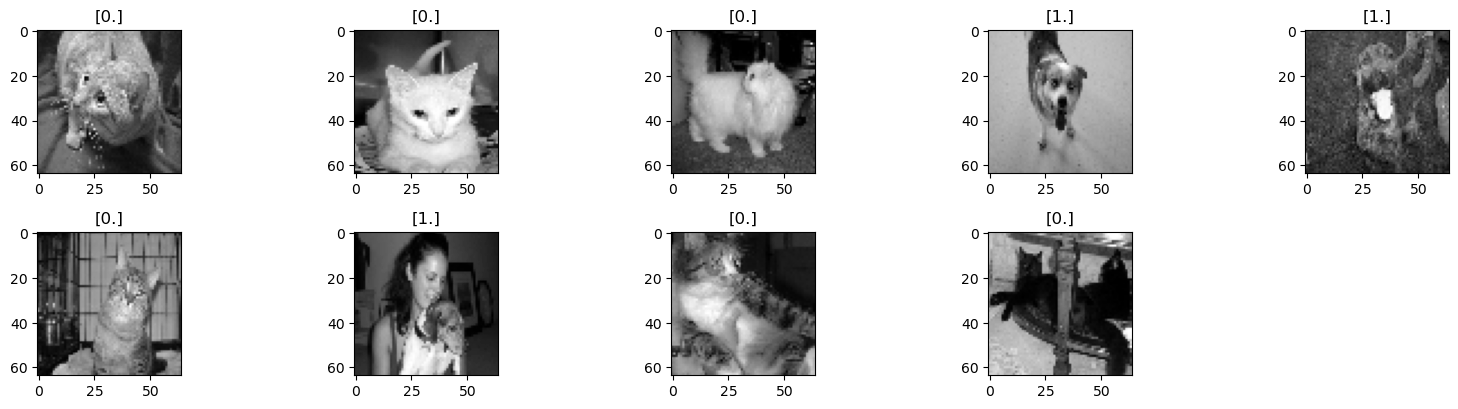

In [164]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

## Entrainement du Modele

Passer X_train en 2D en multilpliant les 64x64 pixels dans la même dimension

In [165]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) # -1 (Le reste) : X_train.shape[1] * X_train.shape[2]
X_train_reshape.shape

(1000, 4096)

In [166]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1)
X_test_reshape.shape

(200, 4096)

Accuracy :  0.508


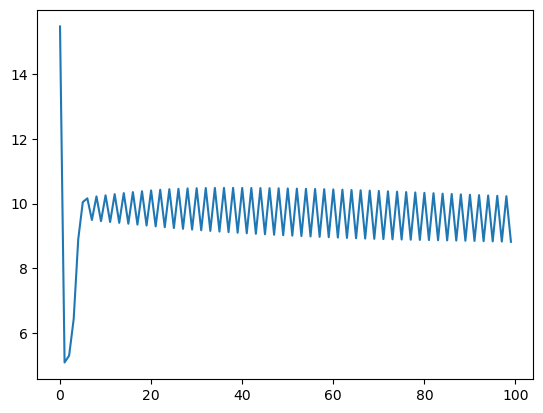

In [182]:
W, b = artificial_neuron(X_train_reshape, y_train)

![training_error](cat_or_dog_png/training_error.png "training_error")

Les exponentielles de notre model retournes des 0 et 1. Or notre fonction cout les reçoit et lorsque un log reçoit 0, cela fait une erreure car log n’est pas définit en 0.

Pour Résoudre ce soucis, nous allons faire intervenir epsilon dans notre fonction log loss pour éviter les 0 (Bonne pratique dans la fonction log loss)

Ensuite il faut normaliser nos données pour régler le soucis des exponentielles trop grandes (Bonne pratique lorsqu’on utilise la descente de gradient)

## Experience Normalisation

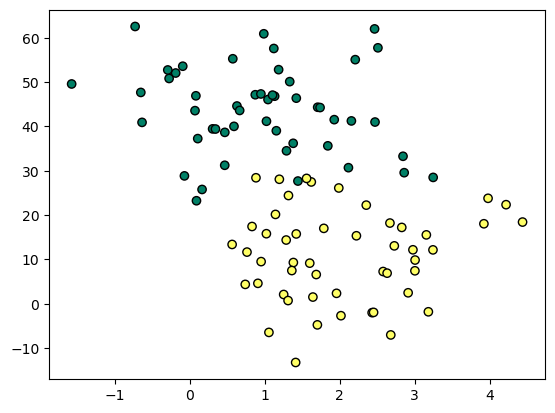

In [168]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,random_state=0)
X[:, 1] = X[:, 1] * 10 # En augmente considérablement les valeurs X1 (deuxième features) cela va un avoir un effet beaucoup plus fort sur log loss

y = y.reshape(y.shape[0], 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer", edgecolors='k')

plt.show()


In [169]:
lim = 10
h = 100
W1 = np.linspace(-lim, lim, h)
W2 = np.linspace(-lim, lim, h)

W11, W22 = np.meshgrid(W1, W2) # Matrice couvrant toutes les coordonnés de points

W_final = np.c_[W11.ravel(), W22.ravel()].T # Ravel "compresse les valeurs" (passe d’une matrice 2D à 1D en concervant l’ordre des valeurs => [3, 2, 1], [3, 2, 1] => [3, 2, 1, 3, 2, 1])
W_final.shape # On concaténe et transpose les valeurs compréssé pour avoir une matrice avec toutes les combinaisons de points pour faire des manipulations matricielles 

(2, 10000)

In [170]:
b = 0
Z = X.dot(W_final) + b
A = 1 / (1 + np.exp(-Z)) 
A.shape

epsilon = 1e-15 
L = 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon), axis=0).reshape(W11.shape) # Avec axis = 0 on indique à numpy de sommer les lignes, par défault, axis=None
L.shape

(100, 100)

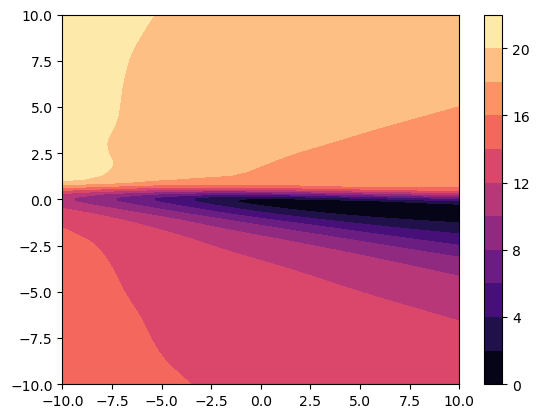

In [171]:
plt.contourf(W11, W22, L, 10 ,cmap='magma')
plt.colorbar()

On voit que que la fonction cout est étiré car log loss est obnibulé par la features qui est à plus grand échelle, car c’est elle qui fait varié log loss. En faisant la descente de gradient, on va facilement trouver la valeur optimale de la feature dominante, mais pour la seconde, vu qu’elle ne fait pas grandement varié log loss, cela va être plus compliqué a trouver (car la descente de gradient utilise la pente logloss pour ajuster les poids W). Ce qui va rendre l’apprentissage beaucoup plus long, car les gradients seront beaucoup plus grands pour la feature imposante et petit pour la feature moin imposante, entrainant un apprentissage plus long et oscillant.

In [172]:
def artificial_neuron_2(X, y, learning_rate = 0.1, n_iter = 100):
    W, b = initialisation(X)
    W[0], W[1] = -7.5, -7.5

    nb = 10
    j = 0
    history = np.zeros((n_iter // nb, 5))
    Loss = []

    for _ in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(y, A))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    if (i % nb == 0):
        history[j, 0] = W[0]
        history[j, 1] = W[1]
        history[j, 2] = b
        history[j, 3] = i
        history[j, 4] = log_loss(y, A)
        j += 1


    plt.plot(Loss)
    plt.show()

    return(history, b)

    

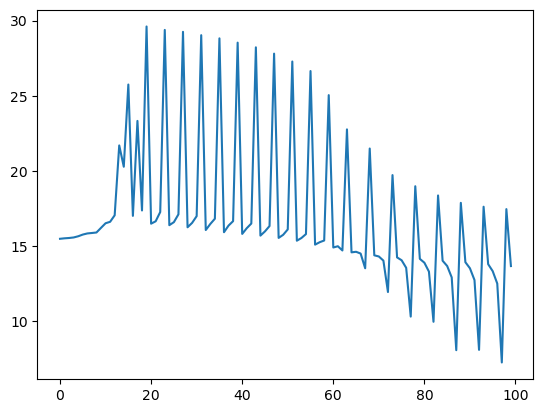

In [173]:
history, b = artificial_neuron_2(X, y)

On le voit, que sans normalisation, log loss apprend mal, elle devrai converger vers un point

### 📌 Impact de l’échelle des features sur la descente de gradient

#### 🔹 Décomposition du problème :

✔ **La fonction coût est étirée**  
➡ **Car la log loss est dominée par la feature qui a une échelle plus grande**.  

✔ **La descente de gradient trouve vite la valeur optimale pour cette feature**  
➡ **Car elle fait varier fortement la log loss**.  

✔ **Mais la seconde feature est difficile à optimiser**  
➡ **Car elle n’impacte presque pas la log loss**.  

✔ **Les gradients sont très grands pour la feature dominante et très petits pour l’autre**  
➡ **Donc l’optimisation avance trop vite dans une direction et trop lentement dans l’autre**.  

✔ **Conséquences :**  
- **Apprentissage plus long** (convergence lente).  
- **Oscillations** (la descente de gradient "rebondit" dans la direction de la feature dominante).  

---

### 🚀 Ce que la normalisation va corriger :
- **Équilibrer les gradients** ✅  
- **Accélérer la convergence** ✅  
- **Stabiliser l’apprentissage** ✅  


Pour cela nous allons faire la normalisation minmax pour nos pixels. Nos pixels valent de 0 à 255 pixel, on peut simplifier en disant tout simplement que X = X / Xmax

![min_max](cat_or_dog_png/min_max.png "min_max")

In [174]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max() # Max de 254 à 1.
X_train_reshape.shape

(1000, 4096)

In [175]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max() # On normalise sur les données sur train car il à été entrainé sur ces données : preprocessing
X_test_reshape.shape

(200, 4096)

### Lent à executer, si on veut executer le travail du neuronne artificiel

In [219]:
# W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test ,learning_rate=0.01, n_iter=10000) 

![train_vs_test](cat_or_dog_png/train_vs_test.png "train_vs_test")

Plus le model s’entraine, plus il diminue la train mais pas le test, ce qu’il veut dire qu’il apprend mal, en d’autre terme, il n’arrive plus à généraliser ce qu’il apprend pour l’appliqué au test, qui est le jeu de donnée que nous voulons prédire.

Pour le loss c’est un peu pareil, plus les itérations d’apprentissages augmentent, plus sa améliore l’accuracy du train mais pas celle du test, voir l’augmente.

Pour résoudre ce problème, 

1 : Fournir plus de données car 1000 photos n’est pas assez pour entrainer un model de neuronnes artificiels. 

2 : Fléau de la dimension : On pourrai réduire le nombre de variables

Le soucis est qu’il est trop simpliste, il est linéaire : Rajouter des neuronnes 